<a href="https://colab.research.google.com/github/David-Junior/Lab-Reports-Undergrad-/blob/main/FMM3_231_Fluid_Mechics_I_Calibration_of_Pressure_Gauges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import pandas as pd

gauge1 = pd.read_csv(io.StringIO('''
Force (lb),Gauge 1 (psi)
0,25
10,35
15,40
20,45
25,50
30,55
35,60
40,65
45,70
50,75
55,80
60,85
65,90
70,95
75,100
80,105
85,110
90,120
95,125
100,130
105,135
110,140
'''), header=0)
# Convert 'Force (lb)' column to numeric
gauge1['Force (lb)'] = pd.to_numeric(gauge1['Force (lb)'])
# Add 'True Pressure (psi)' column
gauge1['True Pressure (psi)'] = gauge1['Force (lb)'] / 0.2

gauge2 = pd.read_csv(io.StringIO('''
Force (lb),Gauge 2 (psi)
0,20
10,35
15,35
20,45
25,45
30,45
35,55
40,55
45,60
50,65
55,70
60,75
65,75
70,80
75,85
80,100
85,100
90,105
95,110
100,115
105,120
110,120
115,125
120,140
125,140
130,150
135,155
140,160
'''), header=0)
# Convert 'Force (lb)' column to numeric
gauge2['Force (lb)'] = pd.to_numeric(gauge2['Force (lb)'])
# Add 'True Pressure (psi)' column
gauge2['True Pressure (psi)'] = gauge2['Force (lb)'] / 0.2

In [ ]:
import numpy as np

# Calculate Relative error (%) for gauge1
# To avoid division by zero, we'll replace 0 in 'True Pressure (psi)' with a small number or handle it.
# For now, let's assume 'True Pressure (psi)' will not be zero where a relative error is meaningful.
# If 'True Pressure (psi)' is 0, the relative error is undefined, so we'll set it to NaN or 0.
gauge1['Relative error (%)'] = ((gauge1['Gauge 1 (psi)'] - gauge1['True Pressure (psi)']) / gauge1['True Pressure (psi)']) * 100
gauge1.loc[gauge1['True Pressure (psi)'] == 0, 'Relative error (%)'] = np.nan # Handle division by zero

# Calculate Relative error (%) for gauge2
gauge2['Relative error (%)'] = ((gauge2['Gauge 2 (psi)'] - gauge2['True Pressure (psi)']) / gauge2['True Pressure (psi)']) * 100
gauge2.loc[gauge2['True Pressure (psi)'] == 0, 'Relative error (%)'] = np.nan # Handle division by zero

print('--- Gauge 1 Analysis ---')
print(gauge1.head())
print(f"\nStandard Deviation of Relative Error (Gauge 1): {gauge1['Relative error (%)'].std():.2f} %")
rmse_gauge1 = np.sqrt(np.mean((gauge1['Gauge 1 (psi)'] - gauge1['True Pressure (psi)'])**2))
print(f"Root Mean Square Error (RMSE) for Gauge 1: {rmse_gauge1:.2f} psi")

print('\n--- Gauge 2 Analysis ---')
print(gauge2.head())
print(f"\nStandard Deviation of Relative Error (Gauge 2): {gauge2['Relative error (%)'].std():.2f} %")
rmse_gauge2 = np.sqrt(np.mean((gauge2['Gauge 2 (psi)'] - gauge2['True Pressure (psi)'])**2))
print(f"Root Mean Square Error (RMSE) for Gauge 2: {rmse_gauge2:.2f} psi")

--- Gauge 1 Analysis ---
   Force (lb)  Gauge 1 (psi)  True Pressure (psi)  Relative error (%)
0           0             25                  0.0                 NaN
1          10             35                 50.0          -30.000000
2          15             40                 75.0          -46.666667
3          20             45                100.0          -55.000000
4          25             50                125.0          -60.000000

Standard Deviation of Relative Error (Gauge 1): 11.14 %
Root Mean Square Error (RMSE) for Gauge 1: 239.39 psi

--- Gauge 2 Analysis ---
   Force (lb)  Gauge 2 (psi)  True Pressure (psi)  Relative error (%)
0           0             20                  0.0                 NaN
1          10             35                 50.0          -30.000000
2          15             35                 75.0          -53.333333
3          20             45                100.0          -55.000000
4          25             45                125.0          -64.00000

In [ ]:
gauge1

,Force (lb),Gauge 1 (psi),True Pressure (psi),Relative error (%)
0,0,25,0.0,NaN
1,10,35,50.0,-30.000000
2,15,40,75.0,-46.666667
3,20,45,100.0,-55.000000
4,25,50,125.0,-60.000000
5,30,55,150.0,-63.333333
6,35,60,175.0,-65.714286
7,40,65,200.0,-67.500000
8,45,70,225.0,-68.888889
9,50,75,250.0,-70.000000


In [ ]:
gauge2

,Force (lb),Gauge 2 (psi),True Pressure (psi),Relative error (%)
0,0,20,0.0,NaN
1,10,35,50.0,-30.000000
2,15,35,75.0,-53.333333
3,20,45,100.0,-55.000000
4,25,45,125.0,-64.000000
5,30,45,150.0,-70.000000
6,35,55,175.0,-68.571429
7,40,55,200.0,-72.500000
8,45,60,225.0,-73.333333
9,50,65,250.0,-74.000000


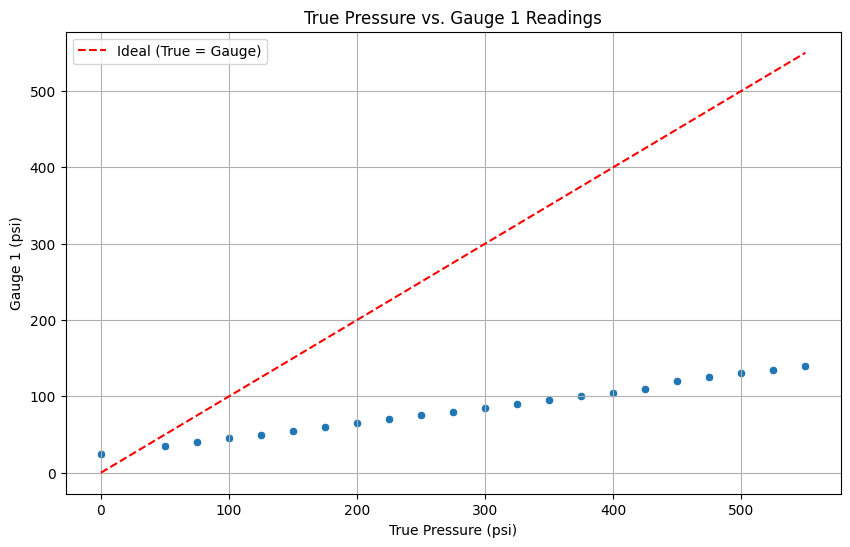

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot True Pressure vs Gauge 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True Pressure (psi)', y='Gauge 1 (psi)', data=gauge1)
plt.plot(gauge1['True Pressure (psi)'], gauge1['True Pressure (psi)'], color='red', linestyle='--', label='Ideal (True = Gauge)')
plt.title('True Pressure vs. Gauge 1 Readings')
plt.xlabel('True Pressure (psi)')
plt.ylabel('Gauge 1 (psi)')
plt.grid(True)
plt.legend()
plt.show()

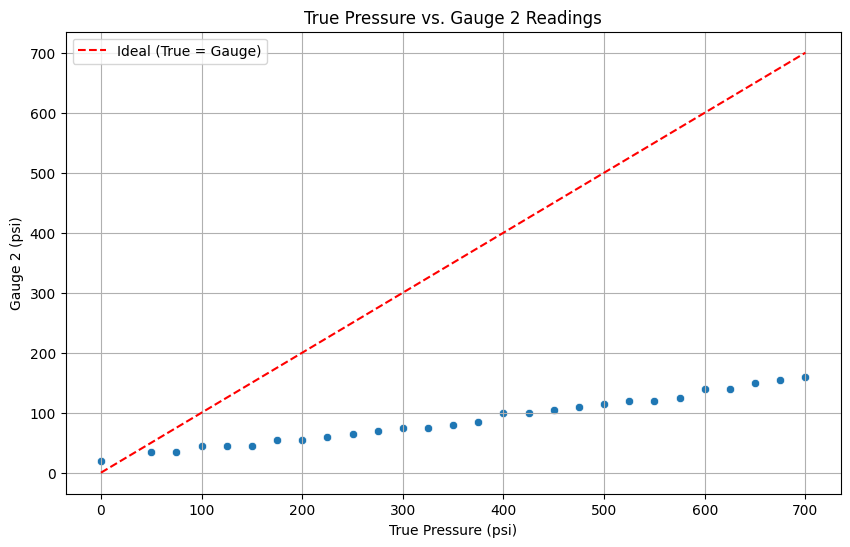

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot True Pressure vs Gauge 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='True Pressure (psi)', y='Gauge 2 (psi)', data=gauge2)
plt.plot(gauge2['True Pressure (psi)'], gauge2['True Pressure (psi)'], color='red', linestyle='--', label='Ideal (True = Gauge)')
plt.title('True Pressure vs. Gauge 2 Readings')
plt.xlabel('True Pressure (psi)')
plt.ylabel('Gauge 2 (psi)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from scipy.stats import linregress

# Linear regression for Gauge 1
x1 = gauge1['True Pressure (psi)']
y1 = gauge1['Gauge 1 (psi)']
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x1, y1)

print(f"--- Gauge 1 Line of Best Fit ---")
print(f"Gradient (Slope): {slope1:.4f}")
print(f"Y-intercept: {intercept1:.4f}")

# Linear regression for Gauge 2
x2 = gauge2['True Pressure (psi)']
y2 = gauge2['Gauge 2 (psi)']
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x2, y2)

print(f"\n--- Gauge 2 Line of Best Fit ---")
print(f"Gradient (Slope): {slope2:.4f}")
print(f"Y-intercept: {intercept2:.4f}")

--- Gauge 1 Line of Best Fit ---
Gradient (Slope): 0.2094
Y-intercept: 23.4397

--- Gauge 2 Line of Best Fit ---
Gradient (Slope): 0.1941
Y-intercept: 18.5618
